In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_co2 = pd.read_csv("Atmospheric_CO2_Concentrations (1).csv")
df_sea_level = pd.read_csv("Change_in_Mean_Sea_Levels.csv")
df_surface_temp = pd.read_csv("Annual_Surface_Temperature_Change (1).csv")
df_forest_and_carbon = pd.read_csv("Forest_and_Carbon.csv")
df_frequency = pd.read_csv("Climate-related_Disasters_Frequency.csv")

Question 1

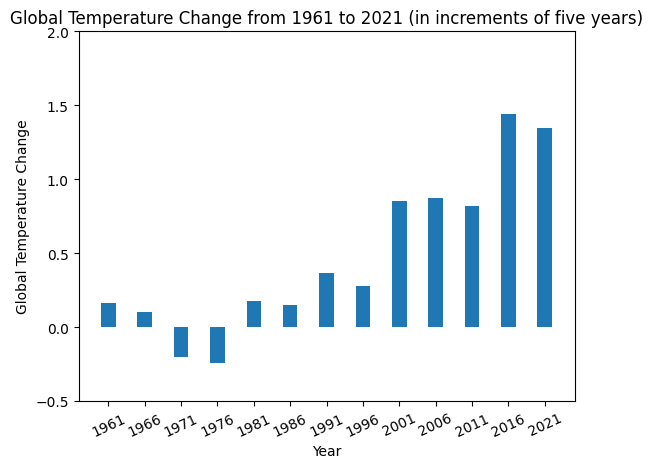

In [ ]:
#Mean Temperature Change Over Time: Jaden

#Increments of five years (1961, 1966, 1971, 1976 and so on)

mean_temp_changes = [] #A list that will hold the global mean temperature change for each year. This list will be added as a column into a dataframe.

#Mmanually going through every five years in the surface temperature dataset, calculating the global mean (since the dataset has it organized by country), and using .append() to add the values to the list.
mean_temp_changes.append(df_surface_temp['F1961'].mean())
mean_temp_changes.append(df_surface_temp['F1966'].mean())
mean_temp_changes.append(df_surface_temp['F1971'].mean())
mean_temp_changes.append(df_surface_temp['F1976'].mean())
mean_temp_changes.append(df_surface_temp['F1981'].mean())
mean_temp_changes.append(df_surface_temp['F1986'].mean())
mean_temp_changes.append(df_surface_temp['F1991'].mean())
mean_temp_changes.append(df_surface_temp['F1996'].mean())
mean_temp_changes.append(df_surface_temp['F2001'].mean())
mean_temp_changes.append(df_surface_temp['F2006'].mean())
mean_temp_changes.append(df_surface_temp['F2011'].mean())
mean_temp_changes.append(df_surface_temp['F2016'].mean())
mean_temp_changes.append(df_surface_temp['F2021'].mean())

#Creates a list holding the years from 1961 to 2021 in five year intervals, the same as what was calculated right above.
years = []
for x in range(1961, 2021+1, 5):
  years.append(x)

#New dataset with two columns: years and the mean global temperature changes. This way, each row has a year and it's mean temperature change (global).
#This is unlike the original dataset, which had each row containing a country (ex: Albania, Canada), and the mean temperature change for said country every year.
#By making this new dataset, the data is now more concise, and only the year and the temperature change relative to the whole world is displayed.
reorganized_data = { #Dictionary that contains the columns and its values for the dataset.
    'Year': years,
    'Mean_Global_Temp_Change': mean_temp_changes
}

reorganized_dataset = pd.DataFrame(reorganized_data) #Converts the dictionary into a dataset.

plt.bar(reorganized_dataset['Year'], reorganized_dataset['Mean_Global_Temp_Change'], width=2) #Creates a bar graph with years on x-axis, mean global temperature change on y-axis. Width value is there for aesthetic and readability purposes.
plt.yticks([-0.5, 0, 0.5, 1, 1.5, 2]) #Sets the yticks to go from -0.5 to 2, as per the instructions for this question.
plt.xticks(years, rotation=25) #The years list is specified to label every year on the x-axis (without it, matplotlib skips some years). The rotation of the x-ticks is there to make the graph readable.

#Labels and titles for the graph and displaing the graph in the output.
plt.xlabel('Year')
plt.ylabel('Global Temperature Change')
plt.title('Global Temperature Change from 1961 to 2021 (in increments of five years)')
plt.show()

Question 2

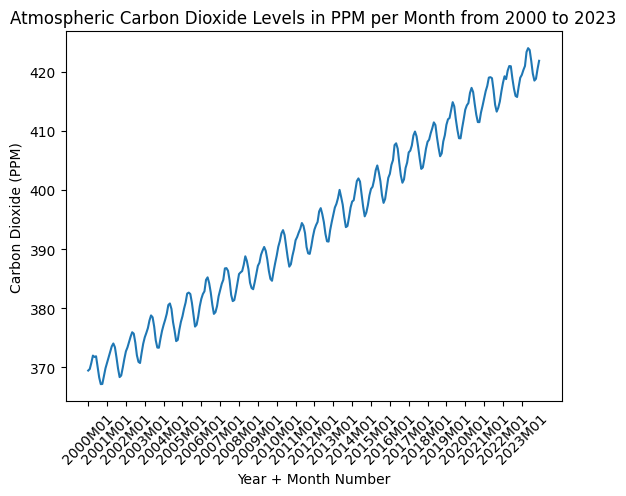

In [ ]:
#Monthly CO2 Levels (PPM): Jaden

#Websites used:
#https://www.geeksforgeeks.org/slicing-indexing-manipulating-and-cleaning-pandas-dataframe/
#https://stackabuse.com/change-tick-frequency-in-matplotlib/

co_2000s = df_co2.iloc[992:1567] #Slices the dataset to only include the months including and after January 2000 (2000M01).
co_2000s_ppm = co_2000s[co_2000s['Unit'] == "Parts Per Million"] #Organizes the dataset to only include the values in PPM, not percent.

#Creating the line graph.
plt.plot(co_2000s_ppm['Date'], co_2000s_ppm['Value']) #Plots the graph with the date on the x-axis (months 2000-2023) and values for each month on y-axis.
plt.xticks(range(0, len(co_2000s_ppm['Date']), 12), rotation=45) #Decreases the number of ticks on the x-axis (increments of 12, showing the first month of every year) and rotates each tick by 45 degrees. This is done for readability.

#Adding labels and a title to the graph and displaying the graph in the output.
plt.ylabel('Carbon Dioxide (PPM)')
plt.xlabel('Year + Month Number')
plt.title('Atmospheric Carbon Dioxide Levels in PPM per Month from 2000 to 2023')
plt.show()

<ipython-input-5-a75c6f9d3c5a>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  co2_percent = pd.to_datetime(co2_percent)


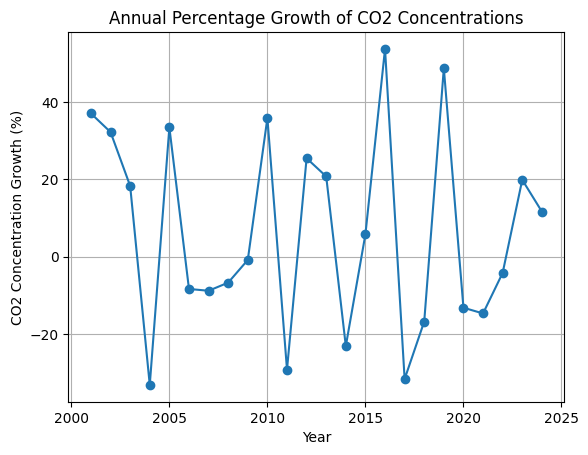

In [ ]:
# Year-over-Year CO2 Change (%): Elizabeth

# Select the Unit column in df_co2 using the comparison operator for equality to find all Value and Date entries that are in percent.
# Store the entries as a dataframe in Percent in the co2_percent variable.
co2_percent = df_co2[df_co2["Unit"] == "Percent"][["Value", "Date"]]

# str Function: Formats the co2_percent Date column as strings.
# Replace Function: Changes the date format in the Date column to YYYY/MM format by replacing all instances of "M" with "/".
co2_percent = co2_percent["Date"].str.replace("M","/")
# pd.to_datetime Function: Converts the Date column in co2_percent to the Pandas date and time format.
co2_percent = pd.to_datetime(co2_percent)
# Groupby Function: Groups the Value column in df_co dataframe by year using the dt.year function on the co2_percent dataframe.
# Mean Function: Finds the mean values of the Value column that is grouped by year. Store this series in co2_percent_date.
co2_percent_date = df_co2.groupby(co2_percent.dt.year)["Value"].mean()
# Source for querying a year within a date (dt.year): https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-date-in-a-non-unique-column
# Filter co2_percent_date by year (the year is now the index of the series so use the index function) so that the series only includes years equal to or greater than 2000, using a comparison operator. Store this series in co2_percent_date.
co2_percent_date = co2_percent_date[co2_percent_date.index >= 2000]

# Percent Change Function: Finds the percent change for each value in co2_percent_date using the formula percent change = ((old value - new value)/old value) * 100. Store this dataframe in co2_percent_change.
co2_percent_change = co2_percent_date.pct_change() * 100
# Source of percent change function: https://www.geeksforgeeks.org/python-pandas-series-pct_change/

# plt.plot Function: Plots the data in co2_percent_change using the index and values functions to access the index and values of the series and plot them on the x and y axis, respectively.
# Label argument: Names the graph.
# Marker argument: Adds an "o" shaped marker to the line graph.
plt.plot(co2_percent_change.index, co2_percent_change.values, label="CO2 Concentration Growth (%)", marker="o")
# Label the x axis, y axis, and title.
plt.xlabel("Year")
plt.ylabel("CO2 Concentration Growth (%)")
plt.title("Annual Percentage Growth of CO2 Concentrations")
# plt.grid Function: Displays gridlines on the graph.
plt.grid(True)
# plt.show Function: Displays the graph.
plt.show()

Question 3

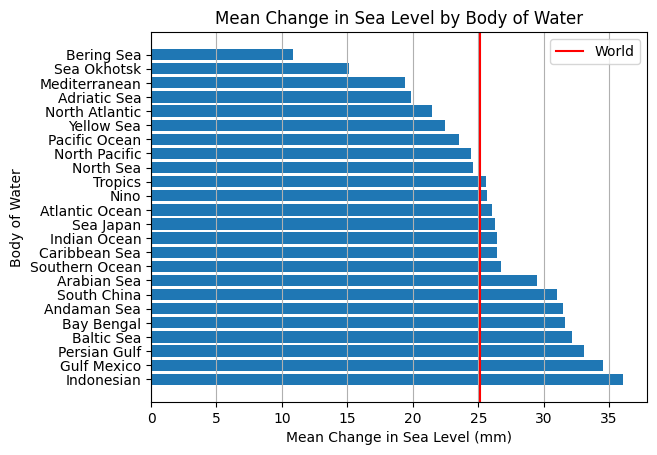

Indonesian: 36.08813333333334
Gulf Mexico: 34.54884912280702
Indonesian: 10.880273684210525
Sea Okhotsk: 15.088947368421053


In [ ]:
# Mean Sea Level Changes: Elizabeth

# Store the entries of the Measure and Value columns in df_sea_level as a dataframe in the sea_level variable.
sea_level = df_sea_level[["Measure", "Value"]]
# Groupby Function: Groups the values in sea_level by the Measure column so that each entry of a value (mean change in sea level (mm)) by body of water is grouped together. Store the grouped dataframe in sea_level.
sea_level = sea_level.groupby("Measure")
# Mean Function: Finds the average of values in the Value column of sea_level so that the average change in sea level is grouped by body of water. Store the series in sea_level_mean.
sea_level_mean = sea_level["Value"].mean()
# sort_values Function: Sorts the entries in the sea_level_mean series in ascending order based on values.
sea_level_mean = sea_level_mean.sort_values(ascending=False)

# Store the world entry in sea_level_mean in the variable world, by indexing the world entry in the sea_level_mean series using label-based indexing (loc function).
world = sea_level_mean.loc["World"]
# Drop Function: Removes the world entry from the sea_level_mean series by indexing the world entry and removing it in the original series using inplace=True.
sea_level_mean.drop("World", inplace=True)

# plt.barh Function: Plots the data in sea_level_mean in a horizontal bar graph using the index and values functions to access the index and values of the series and plot them in the bars and on the scale, respectively.
plt.barh(sea_level_mean.index, sea_level_mean.values)
# Source of DataFrame.values function: https://pandas.pydata.org/docs/reference/api/pandas.Series.values.html
# Label the x axis, y axis, and title.
plt.ylabel("Body of Water")
plt.xlabel("Mean Change in Sea Level (mm)")
plt.title("Mean Change in Sea Level by Body of Water")
# axvline Function: Adds a vertical line to the graph using the coordinates of the world variable. Use the color argument to change the color of the line to red and the label argument to name the line "world".
plt.axvline(world, color="red", label="World")
# plt.legend Function: Displays the legend of the graph using the labels of the figures above.
plt.legend()
# plt.grid Function: Displays a grid on the x axis of the graph based on the argument axis="x".
plt.grid(axis = "x")
# plt.show Function: Displays the graph.
plt.show()

print("Indonesian:", sea_level_mean["Indonesian"])
print("Gulf Mexico:", sea_level_mean["Gulf Mexico"])
print("Indonesian:", sea_level_mean["Bering Sea"])
print("Sea Okhotsk:", sea_level_mean["Sea Okhotsk"])

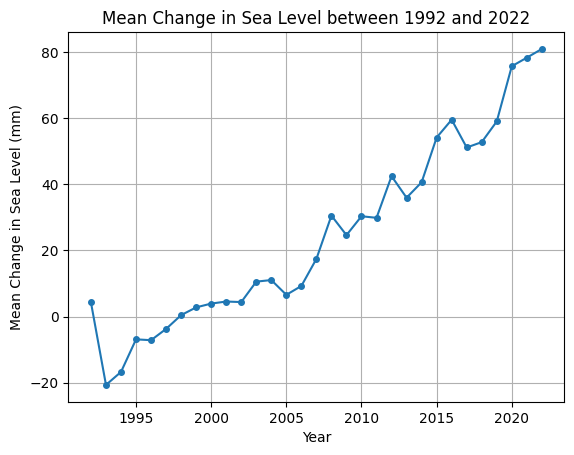

In [ ]:
# str Function: Formats the df_sea_level Date column as strings.
# Replace Function: Changes the date format in the Date column to DD/MM/YYYY format by replacing all instances of "D" with an empty string.
sea_level_date = df_sea_level["Date"].str.replace("D","")
# pd.to_datetime Function: Converts the Date column in sea_level_date to the Pandas date and time format.
sea_level_date = pd.to_datetime(sea_level_date)
# Groupby Function: Groups the Value column in df_sea_level dataframe by year using the dt.year function on the sea_level_date dataframe.
# Mean Function: Finds the mean values of the Value column that is grouped by year. Store this series in sea_level_date.
sea_level_date = df_sea_level.groupby(sea_level_date.dt.year)["Value"].mean()
# Source for querying a year within a date: https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-date-in-a-non-unique-column

# plt.plot Function: Plot the data in sea_level_date using the index and values functions to access the index and values of the series and plot them on the x and y axis, respectively.
# Label argument: Names the graph.
# Marker argument: Adds an "o" shaped marker to the line graph.
# Markersize argument: Changes the size of the marker to 4.
plt.plot(sea_level_date.index, sea_level_date.values, label="Mean Change in Sea Level by Year", marker="o", markersize=4)
# Label the x axis, y axis, and title.
plt.xlabel("Year")
plt.ylabel("Mean Change in Sea Level (mm)")
plt.title("Mean Change in Sea Level between 1992 and 2022")
# plt.grid Function: Displays gridlines on the graph.
plt.grid(True)
# plt.show Function: Displays the graph.
plt.show()

Question 4

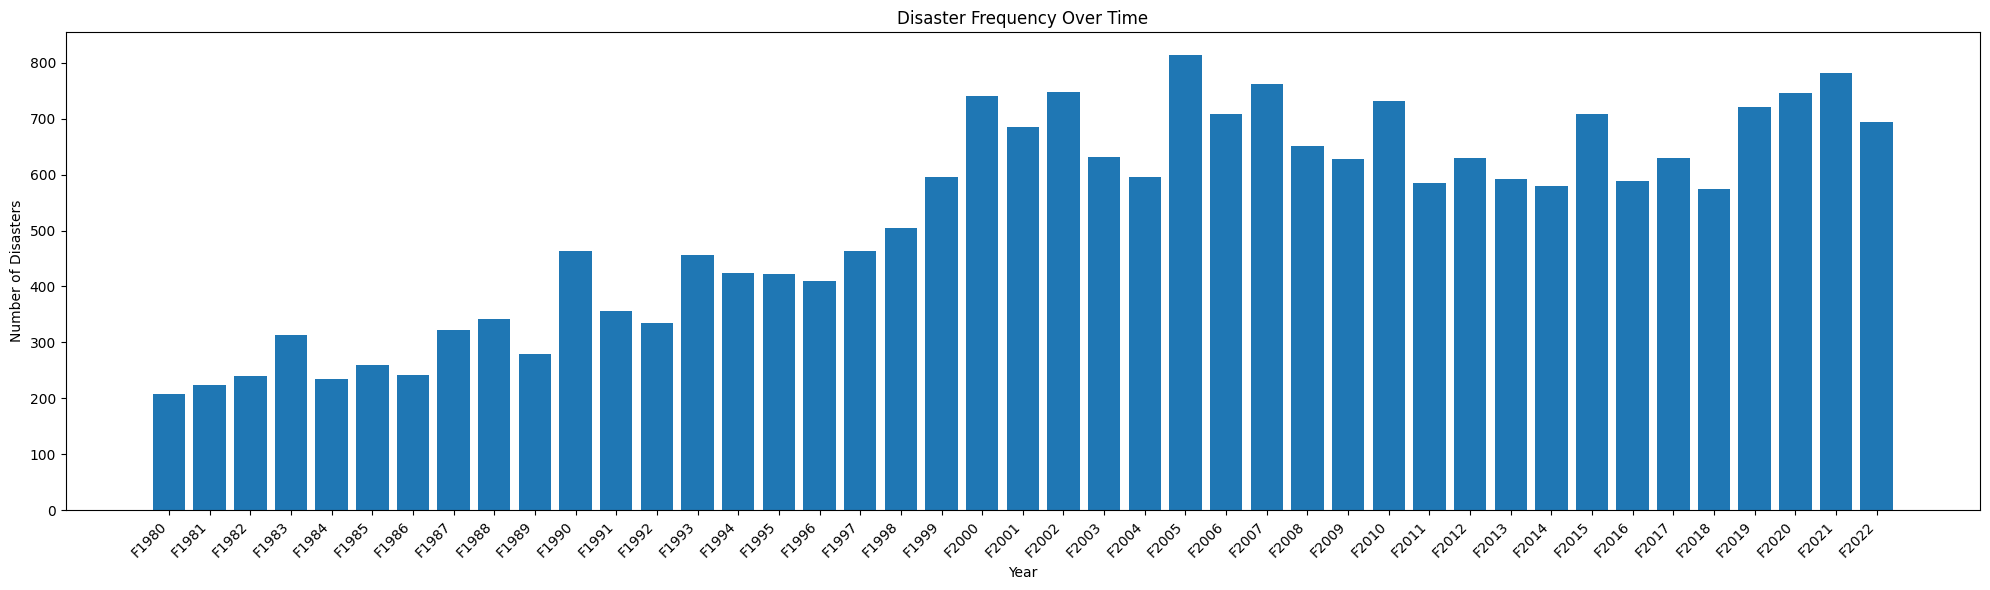

In [ ]:
#df_frequency
years=["F1980", "F1981", "F1982", "F1983", "F1984", "F1985", "F1986", "F1987", "F1988", "F1989", "F1990", "F1991", "F1992", "F1993", "F1994", "F1995", "F1996", "F1997", "F1998", "F1999", "F2000", "F2001", "F2002", "F2003", "F2004", "F2005", "F2006", "F2007", "F2008", "F2009", "F2010", "F2011", "F2012", "F2013", "F2014", "F2015", "F2016", "F2017", "F2018", "F2019", "F2020", "F2021", "F2022"]
#disasters=[df_frequency['F1980'] ,  df_frequency['F1981'], df_frequency['F1982'], df_frequency['F1983'], df_frequency['F1984'], df_frequency['F1985'], df_frequency['F1986'], df_frequency['F1987'], df_frequency['F1988'], df_frequency['F1989'], df_frequency['F1990'], df_frequency['F1991'], df_frequency['F1992'], df_frequency['F1993'], df_frequency['F1994'], df_frequency['F1995'], df_frequency['F1996'], df_frequency['F1997'], df_frequency['F1998'], df_frequency['F1999'], df_frequency['F2000'], df_frequency['F2001'], df_frequency['F2002'], df_frequency['F2003'], df_frequency['F2004'], df_frequency['F2005'], df_frequency['F2006'], df_frequency['F2007'], df_frequency['F2008'], df_frequency['F2009'], df_frequency['F2010'], df_frequency['F2011'], df_frequency['F2012'], df_frequency['F2013'], df_frequency['F2014'], df_frequency['F2015'], df_frequency['F2016'], df_frequency['F2017'], df_frequency['F2018'], df_frequency['F2019'], df_frequency['F2020'], df_frequency['F2021'], df_frequency['F2022']]
disasters = [df_frequency[year].sum() for year in years]#<ai was used
plt.figure(figsize=(20,6))

plt.bar(years,disasters)
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Disaster Frequency Over Time")
plt.xticks(rotation=45, ha='right')#ai
plt.tight_layout()
plt.show()

Question 5

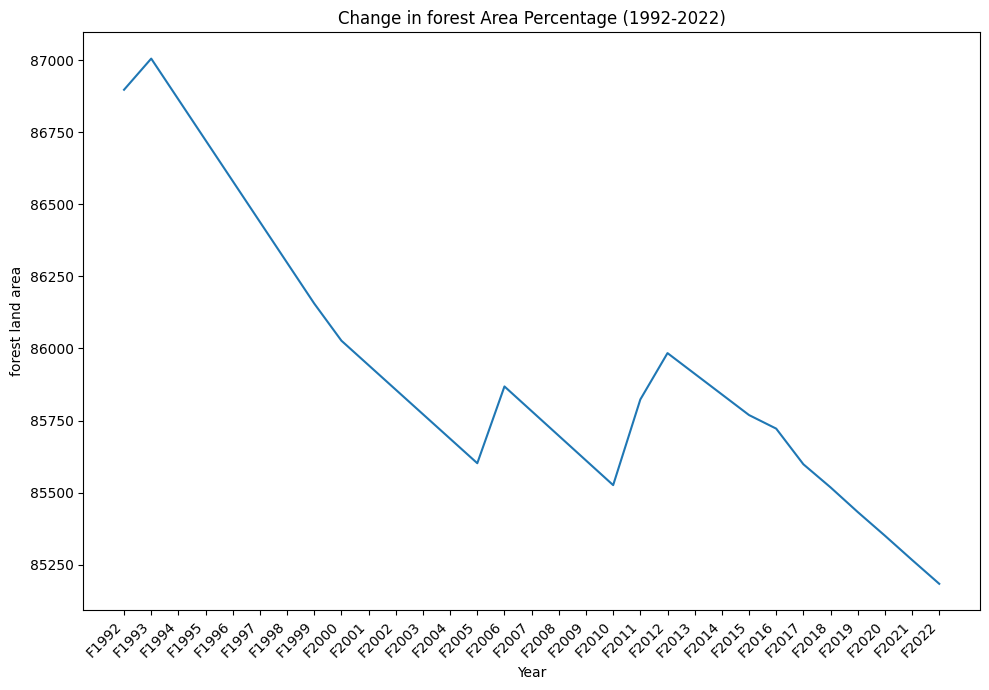

In [ ]:
#!!! This question was researched and used some of the code made by ai!!!

# Filter for the relevant data for forest area
years = ["F1992", "F1993", "F1994", "F1995", "F1996", "F1997", "F1998", "F1999", "F2000", "F2001", "F2002", "F2003", "F2004", "F2005", "F2006", "F2007", "F2008", "F2009", "F2010", "F2011", "F2012", "F2013", "F2014", "F2015", "F2016", "F2017", "F2018", "F2019", "F2020", "F2021", "F2022"]

# Filter the dataset for the 'Land area' indicator
forest_area = df_forest_and_carbon[df_forest_and_carbon['Indicator'] == 'Forest area'][years]

# Plot the data
plt.figure(figsize=(10, 7))
plt.plot(years, forest_area.mean())
plt.xlabel("Year")
plt.ylabel("forest land area")
plt.title("Change in forest Area Percentage (1992-2022)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
||                                  qwq